In [1]:
# Import packages needed

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Read csv file and view first 5 rows

daily_tracking = pd.read_csv('daily_tracking.csv')
daily_tracking.head()


C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,6,7,11,16,17,18,19,20,21,22,23,25,26,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,DayOfWeek,WakeUpTime,BedTime,HoursOfSleep,SleepScore,UpAtFirstAlarm,Breakfast,HRV,OxygenSaturation,...,Journal,Migraine,Alcohol,UsedPlanner,ScreenTime,CaffeineIntake,FatigueLevelAt2,MorningHappinessLevel,NightHappinessLevel,HappinessChange
0,5/17/2021,Monday,6.016667,0.150000,5.750000,75.0,Yes,No,84.0,97.0,...,Yes,No,No,No,3.933333,340.0,6.0,5.0,4.0,-1.0
1,5/18/2021,Tuesday,6.766667,22.966667,8.083333,81.0,No,Yes,80.0,96.0,...,Yes,No,No,Yes,5.683333,200.0,7.0,4.0,6.0,2.0
2,5/19/2021,Wednesday,5.966667,21.150000,6.083333,72.0,No,Yes,62.0,97.0,...,No,No,Yes,No,3.983333,240.0,8.0,3.0,4.0,1.0
3,5/20/2021,Thursday,4.150000,20.700000,6.300000,75.0,Yes,Yes,61.0,96.0,...,No,No,No,No,4.833333,420.0,7.0,6.0,4.0,-2.0
4,5/21/2021,Friday,4.283333,22.983333,6.750000,77.0,Yes,Yes,78.0,96.0,...,No,No,Yes,No,3.833333,400.0,5.0,5.0,5.0,0.0


In [3]:
# Change yes and no values to 1 and 0
# Turn values with NA into 0
# Drop last row where part of data maybe missing for whatever reason

daily_tracking = daily_tracking.replace(to_replace=['Yes', 'No'], value = ['1',  '0'])
daily_tracking['WorkoutScore'] = daily_tracking['WorkoutScore'].fillna(0)
daily_tracking['MorningProductiveThing'] = daily_tracking['MorningProductiveThing'].fillna(0)
daily_tracking['WhatWasLearned'] = daily_tracking['WhatWasLearned'].fillna(0)
daily_tracking['TimeTaken'] = daily_tracking['TimeTaken'].fillna(0)
daily_tracking.dropna(inplace = True)
daily_tracking

,Date,DayOfWeek,WakeUpTime,BedTime,HoursOfSleep,SleepScore,UpAtFirstAlarm,Breakfast,HRV,OxygenSaturation,...,Journal,Migraine,Alcohol,UsedPlanner,ScreenTime,CaffeineIntake,FatigueLevelAt2,MorningHappinessLevel,NightHappinessLevel,HappinessChange
0,5/17/2021,Monday,6.016667,0.150000,5.750000,75.0,1,0,84.0,97.0,...,1,0,0,0,3.933333,340.0,6.0,5.0,4.0,-1.0
1,5/18/2021,Tuesday,6.766667,22.966667,8.083333,81.0,0,1,80.0,96.0,...,1,0,0,1,5.683333,200.0,7.0,4.0,6.0,2.0
2,5/19/2021,Wednesday,5.966667,21.150000,6.083333,72.0,0,1,62.0,97.0,...,0,0,1,0,3.983333,240.0,8.0,3.0,4.0,1.0
3,5/20/2021,Thursday,4.150000,20.700000,6.300000,75.0,1,1,61.0,96.0,...,0,0,0,0,4.833333,420.0,7.0,6.0,4.0,-2.0
4,5/21/2021,Friday,4.283333,22.983333,6.750000,77.0,1,1,78.0,96.0,...,0,0,1,0,3.833333,400.0,5.0,5.0,5.0,0.0
5,5/22/2021,Saturday,5.016667,21.016667,5.583333,77.0,1,1,64.0,97.0,...,0,0,0,0,3.033333,320.0,4.0,5.0,3.0,-2.0
6,5/23/2021,Sunday,5.333333,20.266667,7.550000,80.0,1,0,47.0,96.0,...,0,1,0,0,1.733333,240.0,3.0,6.0,4.0,-2.0
7,5/24/2021,Monday,4.966667,20.433333,7.533333,83.0,0,1,73.0,97.0,...,0,0,1,0,4.366667,120.0,8.0,4.0,3.0,-1.0
8,5/25/2021,Tuesday,5.766667,21.283333,8.500000,87.0,0,1,56.0,96.0,...,1,1,0,0,2.633333,180.0,2.0,7.0,8.0,1.0
9,5/26/2021,Wednesday,4.466667,21.116667,6.483333,78.0,0,1,57.0,95.0,...,1,0,0,0,4.333333,180.0,5.0,6.0,5.0,-1.0


In [4]:
# List all data types

daily_tracking.dtypes

Date                       object
DayOfWeek                  object
WakeUpTime                float64
BedTime                   float64
HoursOfSleep              float64
SleepScore                float64
UpAtFirstAlarm             object
Breakfast                  object
HRV                       float64
OxygenSaturation          float64
FocusLevel                float64
Workout                    object
WorkoutScore              float64
BrushedTeeth              float64
Water                     float64
HeartRate                 float64
Shower                     object
ProductiveMorning          object
MorningProductiveThing     object
FruitOrVegetable           object
LearnedSomething           object
WhatWasLearned             object
Rosary                     object
Bible                      object
PagesRead                 float64
BookBeingRead              object
Vitamins                   object
TimeTaken                 float64
Journal                    object
Migraine      

In [5]:
# Change 1 and 0 values from objects to ints

daily_tracking['UpAtFirstAlarm'] = daily_tracking['UpAtFirstAlarm'].astype(str).astype(int)
daily_tracking['Breakfast'] = daily_tracking['Breakfast'].astype(str).astype(int)
daily_tracking['Workout'] = daily_tracking['Workout'].astype(str).astype(int)
daily_tracking['Shower'] = daily_tracking['Shower'].astype(str).astype(int)
daily_tracking['ProductiveMorning'] = daily_tracking['ProductiveMorning'].astype(str).astype(int)
daily_tracking['FruitOrVegetable'] = daily_tracking['FruitOrVegetable'].astype(str).astype(int)
daily_tracking['LearnedSomething'] = daily_tracking['LearnedSomething'].astype(str).astype(int)
daily_tracking['Rosary'] = daily_tracking['Rosary'].astype(str).astype(int)
daily_tracking['Bible'] = daily_tracking['Bible'].astype(str).astype(int)
daily_tracking['Vitamins'] = daily_tracking['Vitamins'].astype(str).astype(int)
daily_tracking['Journal'] = daily_tracking['Journal'].astype(str).astype(int)
daily_tracking['Migraine'] = daily_tracking['Migraine'].astype(str).astype(int)
daily_tracking['Alcohol'] = daily_tracking['Alcohol'].astype(str).astype(int)
daily_tracking['UsedPlanner'] = daily_tracking['UsedPlanner'].astype(str).astype(int)

In [6]:
 # Check to make sure all data needed to be casted as an int has been converted
 
 daily_tracking.dtypes

Date                       object
DayOfWeek                  object
WakeUpTime                float64
BedTime                   float64
HoursOfSleep              float64
SleepScore                float64
UpAtFirstAlarm              int32
Breakfast                   int32
HRV                       float64
OxygenSaturation          float64
FocusLevel                float64
Workout                     int32
WorkoutScore              float64
BrushedTeeth              float64
Water                     float64
HeartRate                 float64
Shower                      int32
ProductiveMorning           int32
MorningProductiveThing     object
FruitOrVegetable            int32
LearnedSomething            int32
WhatWasLearned             object
Rosary                      int32
Bible                       int32
PagesRead                 float64
BookBeingRead              object
Vitamins                    int32
TimeTaken                 float64
Journal                     int32
Migraine      

In [7]:
# Get numeric dataframe of data

daily_tracking_num = daily_tracking.select_dtypes(exclude=['object'])
daily_tracking_num.dtypes

WakeUpTime               float64
BedTime                  float64
HoursOfSleep             float64
SleepScore               float64
UpAtFirstAlarm             int32
Breakfast                  int32
HRV                      float64
OxygenSaturation         float64
FocusLevel               float64
Workout                    int32
WorkoutScore             float64
BrushedTeeth             float64
Water                    float64
HeartRate                float64
Shower                     int32
ProductiveMorning          int32
FruitOrVegetable           int32
LearnedSomething           int32
Rosary                     int32
Bible                      int32
PagesRead                float64
Vitamins                   int32
TimeTaken                float64
Journal                    int32
Migraine                   int32
Alcohol                    int32
UsedPlanner                int32
ScreenTime               float64
CaffeineIntake           float64
FatigueLevelAt2          float64
MorningHap

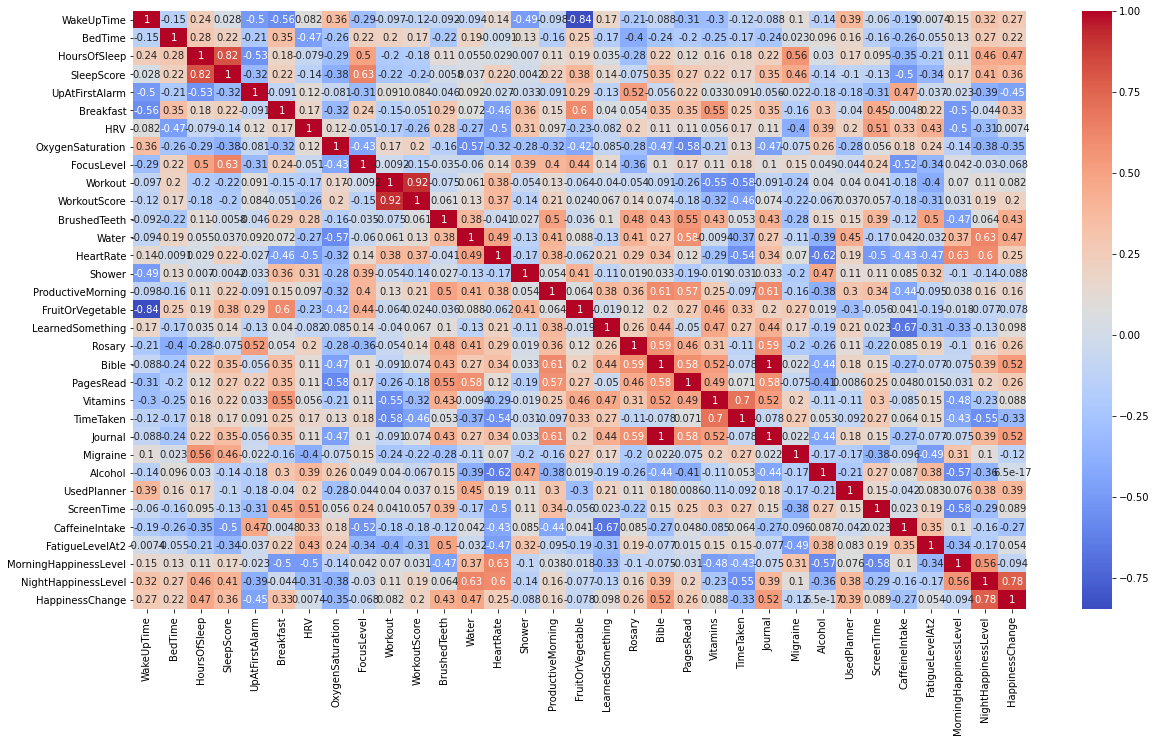

In [8]:
# Correlation heatmap for visual representation 
plt.figure(figsize=(20,11))
daily_tracking_num_correlations = daily_tracking_num.corr()
sns.heatmap(daily_tracking_num_correlations, annot = True, cmap = "coolwarm");

In [9]:
# Finding averages for numeric (not all will make sense)
daily_tracking_num.mean()

WakeUpTime                 5.319608
BedTime                   20.446667
HoursOfSleep               6.735294
SleepScore                78.529412
UpAtFirstAlarm             0.529412
Breakfast                  0.705882
HRV                       62.529412
OxygenSaturation          96.176471
FocusLevel                 4.823529
Workout                    0.294118
WorkoutScore               0.882353
BrushedTeeth               1.470588
Water                     43.823529
HeartRate                 61.705882
Shower                     0.235294
ProductiveMorning          0.705882
FruitOrVegetable           0.647059
LearnedSomething           0.823529
Rosary                     0.235294
Bible                      0.470588
PagesRead                 13.058824
Vitamins                   0.764706
TimeTaken                  8.850980
Journal                    0.470588
Migraine                   0.117647
Alcohol                    0.176471
UsedPlanner                0.176471
ScreenTime                 3